# Storytelling  - SkillCraft 
### "Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning", (Tomphson et al., 2013).

El aprendizaje y desarrollo de habilidades que diferencian a una persona novata de un experto es un proceso complejo. Algunas habilidades pueden ser entrenadas en cortos periodos tiempo (tareas simples), mientras que otras requieren un alto esfuerzo motor y cognitivo para ser llevadas a cabo. Dependiendo de los distintos niveles en los que uno podría clasificar a la persona en función de su habilidad para una tarea (novato, intermedio, avanzado, profesional, etc), ciertas aptitudes de la persona involucradas en la tarea tendrán mayor o menor relevancia para la transición entre las diferentes etapas del aprendizaje. StarcraftII es un juego de estrategia altamente complejo, con diferentes aspectos a tener en cuenta para ganarle al adversario. Este dataset posee el análisis de 2500 jugadores de Starcraft, clasificados en diferentes categorías (ligas) en las que juegan normalmente. Del análisis de este dataset se podrian responder ciertas preguntas especificas al proceso de aprendisaje:

* En el proceso de aprendizaje de una tarea, todas las habilidades involucradas mejoran a la misma tasa?

* Todas las habilidades tienen el mismo peso en el proceso de aprendizaje o existen algunas que permiten grandes saltos?

y otras referidas al juego en si:

* Que características poseen los diferentes jugadores de Starcraft de las distintas ligas?

* Se puede predecir la liga de un jugador en función de la telemetría de sus partidas?



### Motivación y audiencia // IMPORTANCIA COMERCIAL

Este trabajo tiene el objetivo de caracterizar el tipo de jugador de videojuegos en función de como desarrolla sus partidas virtuales. Si bien, este dataset está enfocado en un juego en particular, la idea general sería obtener un algoritmo que sea capaz de predecir y agrupar a un jugador según las decisiones que tome durante el juego y saber a qué grupo (o nivel) de jugadores pertenece. Una vez clasificado, esta información podría ser utilizada por compañías de videojuegos para dirigir publicidad especifica hacia esta persona, ofreciendo desde membresías, otros tipos de juegos con dinámicas similares, nuevas versiones, excétera. La idea subyacente también es que a mejores decisiones que toma la persona en la partida, mayor es el interés y tiempo dedicado a jugar videojuegos y por ende, mayor el nivel de inversión económica que podría estar dispuesto a realizar esta persona.

## Preguntas e hipotesis

Las preguntas e hipotesis que subyasen en este trabajo son diversas. Dentro de las preguntas, se pueden definir:
* Es posible generar un modelo predictivo del nivel de un jugador en base a las desiciones que este mismo toma en sus partidas?
* Que variables serian las mas predictivas o influyentes a la hora de generar esta clasificación?

La hipotesis principal que subyase al trabajo seria:
* Las desiciones que toma un jugador durante la partida son diferentes en funcion del nivel del jugador.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


df=pd.read_csv("SkillCraft1_Dataset.csv",encoding = "latin")


## Liempieza del dataset

In [2]:
df=df.drop('GameID', axis=1)
df = df.replace('?', np.nan) 
df[["Age","HoursPerWeek","TotalHours"]] = df[["Age","HoursPerWeek","TotalHours"]].apply(pd.to_numeric)


## Primera Hipótesis: 
#### * "A mayor nivel en la liga, mayor es el tiempo total y semanal de horas invertidas en el juego"

<AxesSubplot:xlabel='LeagueIndex', ylabel='HoursPerWeek'>

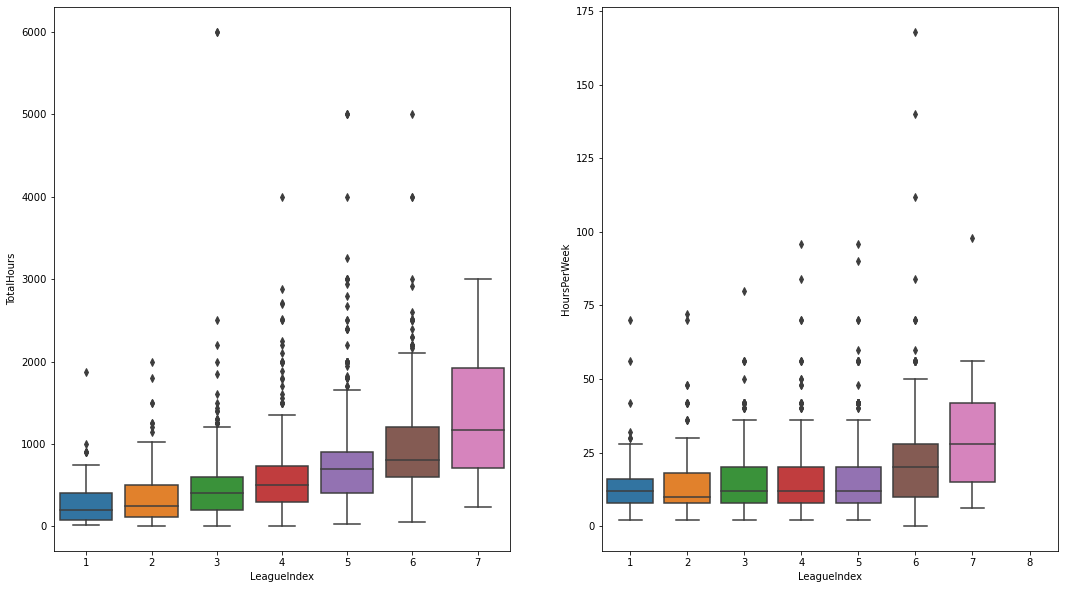

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0], data=df[(df["TotalHours"]  < 7500)], x='LeagueIndex', y='TotalHours')
sns.boxplot(ax=axes[1], data=df, x='LeagueIndex', y='HoursPerWeek')



## Segunda Hipótesis: 
#### * "Las variables que reflejen un juego más dinámico o rápido se asocian positivamente con un mayor nivel en la liga de la cual pertenece el jugador."

<AxesSubplot:>

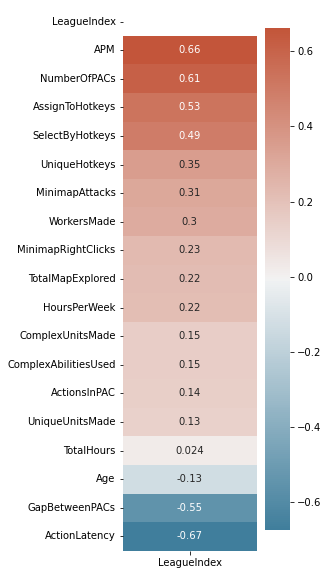

In [4]:
corr = df.corr()
x= corr[["LeagueIndex"]].sort_values(by ="LeagueIndex",ascending=False)
f, ax = plt.subplots(figsize=(3, 10))
mask = np.triu(np.ones_like(x, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(x, annot=True, mask = mask, cmap=cmap)

Del diagrama de correlación se puede observar que la variable "Acciones por minuto" se correlaciona positivamente con la liga del jugador, sugiriendo que, a mayor nivel del jugador, mayor es el número de acciones que ejecuta. Por otro lado, la variable "ActionLatency" que evalúa el tiempo que tarda en responder el jugador frente a un estímulo del juego se correlaciona negativamente con el nivel del jugador.

 ## Tercera Hipótesis: 
#### * "El uso de habilidades complejas en el juego se correlaciona positivamente con el nivel de liga del jugador."
 
 

<AxesSubplot:xlabel='ActionLatency', ylabel='APM'>

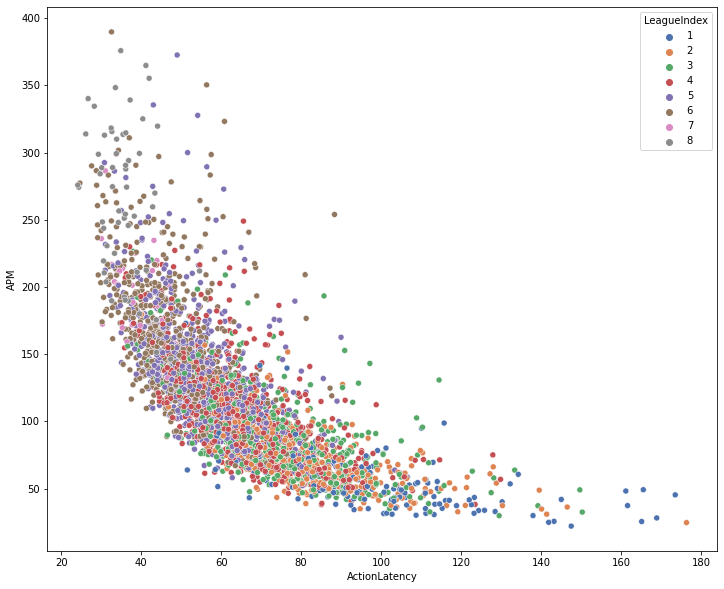

In [5]:
f, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, x="ActionLatency", y="APM", hue="LeagueIndex", palette="deep")


En este grafico de puntos se graficaron las dos variables con los valores de índice de correlación más extremos. Si bien se observa que las ligas más bajas están asociadas a tiempos de latencia altos y números de acciones por minuto menores, no se observa la formación de clústeres o grupos claros que puedan diferenciar a jugadores de la categoría 3 en adelante, implicando que hay otros aspectos a tener en cuenta para la clasificación y generación de un futuro modelo predictivo.

## TABLA RESUMEN DE LOS ML PROBADOS
### Utilizando el mismo algoritmo de selcción (árbol de decisión)

| Metodo de selección | Ajuste de hiperparametros? | Número de variables |precision en el test set | recall en el test set | Ajuste al test set |
| --- | --- | --- | --- | --- | --- |
| Ninguno | No | 18 | 24.8 | 38.2 | Subajuste |
| Ninguno | Si | 18 | 31.0 | 35.2 | Subajuste |
| Ganancia de información | No | 7 | 24.2 | 33.5 | Subajuste |
| Ganancia de información | Si | 7 | 31.2 | 38.5 | Subajuste |
| FISHER SCORE | No | 7 | 28.4 | 31.3 | Subajuste |
| FISHER SCORE | Si | 7 | 28.6 | 35.8 | Subajuste |
| Correlación Lineal | No | 4 | 20 | 28.7 | Subajuste |
| Correlación Lineal | Si | 4 | 30.1 | 38.7 | Subajuste |
| Random Forest Importance | No | 18 | 40.8 | 43.6 | Subajuste |

### Conclusiones PARCIALES

En general, los métodos de seleccion de variables de filtrado mostraron tener un precision y sensitividad cercana al 30%. A su vez, se observo que el ajuste de hiperparametros del árbol mejoro estos puntajes. El mejor metodo que mostro un mejor desempeño fue a traves de un RandomForest. 

Por lo pronto, la reduccion o selección de variables no parece mejorar los modelos de arbol de desicion evaluados.
Se descarta un sobreajuste de los modelos de arbol evaluados debido a que tanto la precision como la sensibilidad disminuyen cuando se los evalúa contra el TEST SET.
### Los metodos de Ensamble podrían ser los mas prometedores para la obtencion de un modelo de ML generalizable.

In [25]:
df=pd.read_csv("SkillCraft1_Dataset.csv",encoding = "latin")
df.columns
df=df.drop('GameID', axis=1)
df = df.replace('?', np.nan) 
df[["Age","HoursPerWeek","TotalHours"]] = df[["Age","HoursPerWeek","TotalHours"]].apply(pd.to_numeric)
df = df.dropna()
df = df.drop(df[df['LeagueIndex'] == '8'].index)
df = df.drop(df[df['LeagueIndex'] == '7'].index)
df= df.reset_index(drop=True)

len(df.axes[1])
print(df["LeagueIndex"].value_counts())

4    811
5    804
6    621
3    553
2    347
1    167
7     35
Name: LeagueIndex, dtype: int64


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_ShuffleSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42) 

for train_index, test_index in stratified_ShuffleSplit.split(df,df["LeagueIndex"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
    
x_train = train_set.iloc[:,1:]
y_train = train_set.iloc[:,0]
x_test = test_set.iloc[:,1:]
y_test = test_set.iloc[:,0]


In [17]:

# Definimos el modelo
rf_model = RandomForestClassifier()

# Definimos los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']}

# Realizamos la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Mostramos los mejores parámetros y puntuaciones obtenidos
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación: ", grid_search.best_score_)

Mejores parámetros:  {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150}
Mejor puntuación:  0.4108614232209738


In [18]:
from sklearn.metrics import precision_score, recall_score

rf_hipertuned = RandomForestClassifier(max_depth=10,
                                      max_features="log2",
                                      n_estimators = 50,
                                      random_state= 42)
rf_hipertuned.fit(x_train, y_train)

test_y_pred = rf_hipertuned.predict(x_test)

precision = precision_score(y_test, test_y_pred, labels=[1,2], average='micro')
recall = recall_score(y_test, test_y_pred, average='micro')

print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)


Precision: 0.416
Recall: 0.436


## Un desempeño similar al Random forest sin mejora en Hiperparametros

In [19]:
from sklearn.metrics import confusion_matrix
verdaderos = y_test# valores verdaderos
predichos = test_y_pred # valores predichos por su modelo
cm = confusion_matrix(verdaderos, predichos)
cm

array([[10, 13,  7,  3,  0,  0,  0],
       [ 5, 22, 30,  9,  4,  0,  0],
       [ 3, 16, 40, 35, 17,  0,  0],
       [ 2,  6, 31, 77, 39,  7,  0],
       [ 0,  0, 13, 42, 69, 37,  0],
       [ 0,  0,  0,  8, 43, 73,  0],
       [ 0,  0,  0,  0,  1,  6,  0]], dtype=int64)